In [71]:
%matplotlib widget

import networkx as nx
import matplotlib.pyplot as plt


In [72]:
def make_graph(n):
    if n == 0:
        G = nx.Graph()
        G.add_nodes_from([1, 2, 3, 4])
        G.add_weighted_edges_from([(1,2,1),(3,1,1),(2, 4,1)])
    else:
        G,pos = make_graph(n-1)
        G.add_nodes_from([3+2*n,4+2*n])
        G.add_weighted_edges_from([(3+2*(n-1),4+2*(n-1),1),(3+2*(n-1),3+2*(n),1),(4+2*(n-1),4+2*(n),1)])
    pos =  {node : ((node-1)//2,node%2) for node in G}
    return(G,pos)

In [73]:
def make_delaunay_graph(n):
    G,pos = make_graph(n)
    G.add_weighted_edges_from([(3+2*n,4+2*n,np.sqrt(2))])
    G.add_weighted_edges_from([(3+2*k,4+2*(k-1),np.sqrt(2)) for k in range(n+1)])

    return(G,pos)

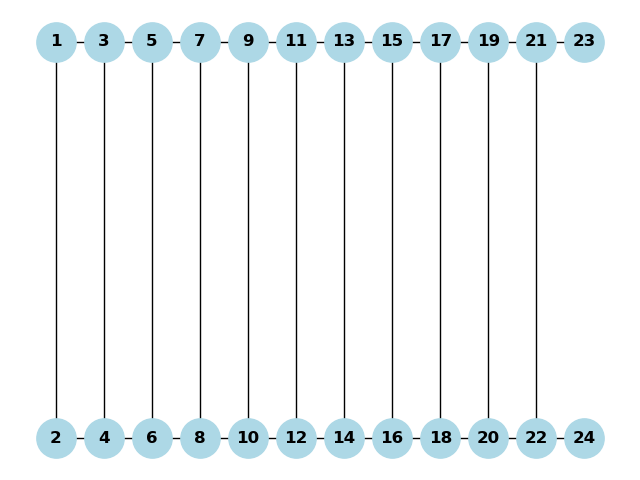

In [95]:
%matplotlib widget
n = 10
G,pos = make_graph(n)
nx.draw(G,pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
plt.show()

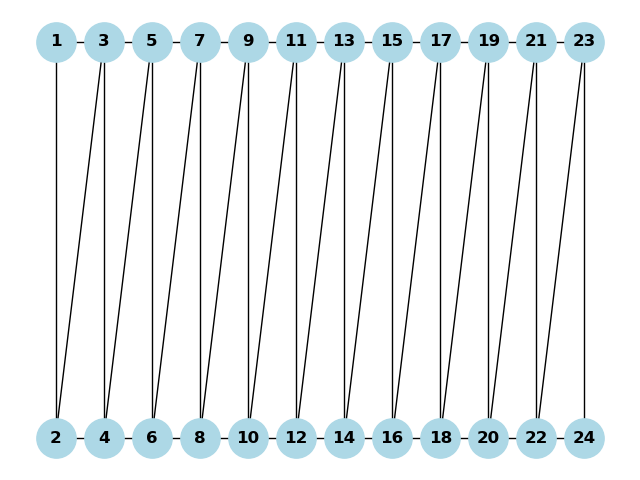

In [98]:
%matplotlib widget

GD,pos = make_delaunay_graph(n)
nx.draw(GD,pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
plt.show()

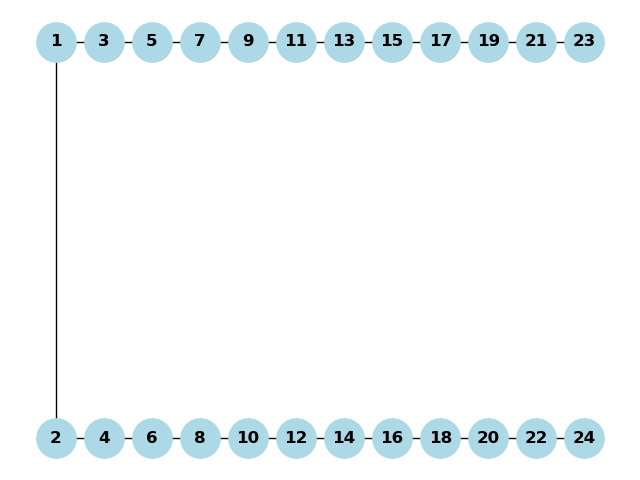

In [99]:
%matplotlib widget

MS = nx.minimum_spanning_tree(G)
nx.draw(MS,pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
plt.show()

In [105]:
x, y =    [1782.0,1333.0],[1799.0,1304.0]
x,y = np.array(x),np.array(y)
np.linalg.norm(x-y)

33.61547262794322

In [58]:
import numpy as np
def compute_global_efficiency(G, pos):
    total_ratio = 0
    count = 0
    all_pairs = nx.all_pairs_dijkstra_path_length(G, weight='length')
    # Iterate over all pairs of nodes
    for node1,distances in all_pairs:
        for node2 in distances.keys():
            if node1 != node2:
                node1_pos = pos[node1]
                node2_pos = pos[node2]
                shortest_path_length = distances[node2]
                distance = np.sqrt((node1_pos[0] - node2_pos[0]) ** 2 + (node1_pos[1] - node2_pos[1]) ** 2)
                # print(node1,node2,shortest_path_length,distance)
                    # Compute the ratio
                ratio = distance / shortest_path_length
                # Accumulate the ratio and increment the count
                total_ratio += ratio
                count += 1
                
    # Compute the average ratio
        # break
    average_ratio = total_ratio / count

    return average_ratio

In [65]:
def normalized_efficiency(n):
    G,pos = make_graph(n)
    GD,pos = make_delaunay_graph(n)
    MS = nx.minimum_spanning_tree(G)
    effG,effGD,effMS = compute_global_efficiency(G,pos),compute_global_efficiency(GD,pos),compute_global_efficiency(MS,pos)
    return((effG-effMS)/(effGD-effMS))

In [60]:
compute_global_efficiency(G,pos),compute_global_efficiency(GD,pos),compute_global_efficiency(MS,pos)

(0.8804367158657961, 0.9874936833252341, 0.7057726936414731)

Text(0, 0.5, '$||E_g||$')

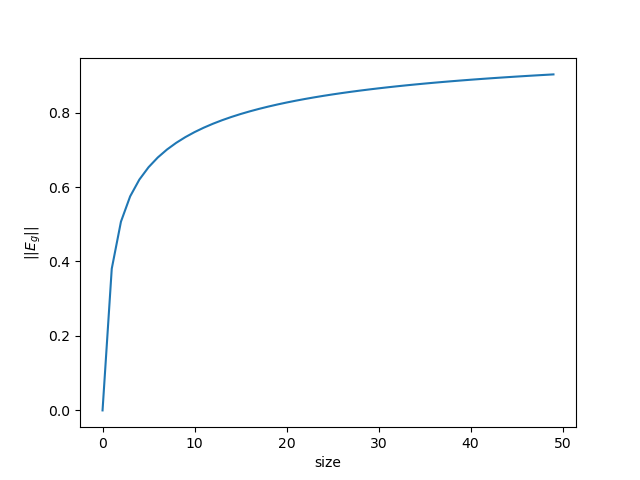

In [86]:
fig,ax = plt.subplots()
n = 50
ax.plot(range(n),[normalized_efficiency(k) for k in range(n)])
ax.set_xlabel('size')
ax.set_ylabel(r'$||E_g||$')

Text(0, 0.5, '$||E_g||$')

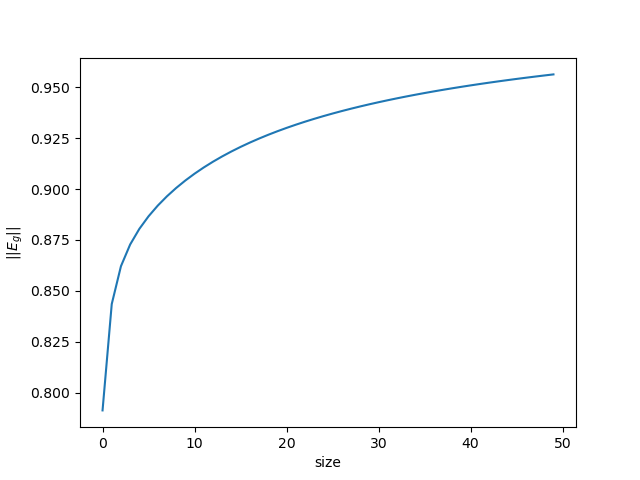

In [100]:
fig,ax = plt.subplots()
n = 50
ax.plot(range(n),[compute_global_efficiency(*make_graph(k)) for k in range(n)])
ax.set_xlabel('size')
ax.set_ylabel(r'$||E_g||$')